# MNIST_DigitRecognition

## Chargement des données et transformation

Nous allons travailler sur la base de données MNIST qui contient 60000 images en niveaux de grille de résolution 28x28, représentant les 10 chiffres de 0 à 9, ainsi qu'un jeu de test de 10000 images. Tout d'abord, chargeons ce jeu de données.

In [43]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation,Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.utils import np_utils
import matplotlib
import matplotlib.pyplot as plt
import scipy
import scipy.ndimage
import numpy as np
from keras import backend as K
import keras

(X_train_base, y_train_base), (X_test_base, y_test_base) = mnist.load_data()


Visualisons quelques données.   

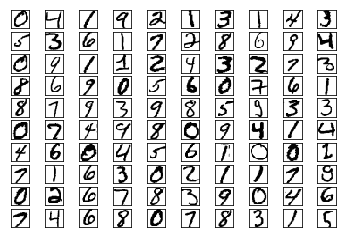

In [45]:
def plot_10_by_10_images(images):
    """ Plot 100 MNIST images in a 10 by 10 table. Note that we crop
    the images so that they appear reasonably close together.  The
    image is post-processed to give the appearance of being continued."""
    fig = plt.figure()
    images = [image[3:25, 3:25] for image in images]
    #image = np.concatenate(images, axis=1)
    for x in range(10):
        for y in range(10):
            ax = fig.add_subplot(10, 10, 10*y+x+1)
            ax.matshow(images[10*y+x+1], cmap = matplotlib.cm.binary)
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))
    plt.show()

plot_10_by_10_images(X_train_base)

Maintenant que nous avons chargé les données, nous allons modifier la dimension de matrices, afin de les mettre sous une forme qui pourra être traitée par nos réseaux de neurones.

In [48]:
subset=10000 #size
nb_classes=10
X_train = X_train_base[:subset].reshape(subset, 784)
X_test = X_test_base.reshape(10000, 784)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255
y_train = np_utils.to_categorical(y_train_base[:subset], nb_classes)
y_test = np_utils.to_categorical(y_test_base, nb_classes)



Nous avons maintenant des vecteurs à la place des images.

In [49]:
print(X_train_base.shape)
print(X_train.shape)


(60000, 28, 28)
(10000, 784)


## Construire un premier réseau de neurones

In [50]:
print(y_train.shape)
print(y_train)

(10000, 10)
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]]


In [51]:
model = Sequential()
model.add(Dense(12, input_shape=(784,),activation='sigmoid'))
model.add(Dense(12,activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes, activation='softmax'))
    
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],  optimizer=sgd)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 12)                9420      
_________________________________________________________________
dense_20 (Dense)             (None, 12)                156       
_________________________________________________________________
dropout_10 (Dropout)         (None, 12)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 10)                130       
Total params: 9,706
Trainable params: 9,706
Non-trainable params: 0
_________________________________________________________________


Ensuite, nous allons lancer l'apprentissage des paramètres.

In [52]:
batch_size = 256
epochs=20
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs,  verbose=1, validation_data=(X_test, y_test))

Train on 10000 samples, validate on 10000 samples
Epoch 1/20
10000/10000 [==============================] - 1s 62us/step - loss: 2.3462 - acc: 0.1226 - val_loss: 2.2539 - val_acc: 0.2021
Epoch 2/20
10000/10000 [==============================] - 0s 20us/step - loss: 2.2213 - acc: 0.1904 - val_loss: 2.0949 - val_acc: 0.4246
Epoch 3/20
10000/10000 [==============================] - 0s 24us/step - loss: 2.0080 - acc: 0.2857 - val_loss: 1.7460 - val_acc: 0.5055
Epoch 4/20
10000/10000 [==============================] - 0s 18us/step - loss: 1.7481 - acc: 0.3529 - val_loss: 1.4419 - val_acc: 0.5797
Epoch 5/20
10000/10000 [==============================] - 0s 19us/step - loss: 1.5549 - acc: 0.4106 - val_loss: 1.2720 - val_acc: 0.6377
Epoch 6/20
10000/10000 [==============================] - 0s 19us/step - loss: 1.4496 - acc: 0.4419 - val_loss: 1.1548 - val_acc: 0.6704
Epoch 7/20
10000/10000 [==============================] - 0s 19us/step - loss: 1.3689 - acc: 0.4801 - val_loss: 1.0595 - val_acc

Voyons ce que donne notre modèle sur un exemple.

The accuracy on the test set is  83.0 %


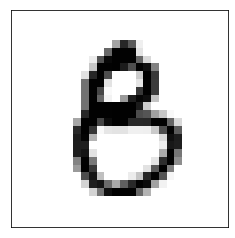

le chiffre reconnu est:  3
le chiffre à reconnaitre  est:  8


In [22]:
def plot_mnist_digit(image):
    """ Plot a single MNIST image."""
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.matshow(image, cmap = matplotlib.cm.binary)
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
    plt.show()
loss,acc = model.evaluate(X_test, y_test,  verbose=0)
index=800
print('The accuracy on the test set is ',(acc*100),'%')
plot_mnist_digit(X_test_base[index])
cl=model.predict_classes(X_test[index].reshape((1,784)))


print("le chiffre reconnu est: ", cl[0])
print("le chiffre à reconnaitre  est: ", np.argmax(y_test[index]))

## CNN

In [56]:
img_rows, img_cols = 28, 28
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train[:subset].reshape(x_train[:subset].shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train = keras.utils.to_categorical(y_train[:subset], nb_classes)
y_test = keras.utils.to_categorical(y_test, nb_classes)


In [57]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (10000, 28, 28, 1)
10000 train samples
10000 test samples


In [58]:
model = Sequential()
model.add(Conv2D(4, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes, activation='softmax'))

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],  optimizer=sgd)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 4)         40        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 4)         0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 13, 13, 4)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 676)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 10)                6770      
_________________________________________________________________
dropout_12 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 10)                110       
Total para

In [59]:
model = Sequential()
model.add(Conv2D(4, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes, activation='softmax'))

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],  optimizer=sgd)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 4)         40        
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 4)         0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 13, 13, 4)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 676)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 100)               67700     
_________________________________________________________________
dropout_14 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 10)                1010      
Total para

In [60]:
batch_size = 256
epochs=20
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,  verbose=1, validation_data=(x_test, y_test))

Train on 10000 samples, validate on 10000 samples
Epoch 1/20
10000/10000 [==============================] - 2s 174us/step - loss: 1.1550 - acc: 0.6075 - val_loss: 0.5106 - val_acc: 0.8148
Epoch 2/20
10000/10000 [==============================] - 1s 138us/step - loss: 0.5874 - acc: 0.8113 - val_loss: 0.2924 - val_acc: 0.9156
Epoch 3/20
10000/10000 [==============================] - 1s 142us/step - loss: 0.4308 - acc: 0.8643 - val_loss: 0.2200 - val_acc: 0.9312
Epoch 4/20
10000/10000 [==============================] - 1s 139us/step - loss: 0.3668 - acc: 0.8861 - val_loss: 0.2113 - val_acc: 0.9367
Epoch 5/20
10000/10000 [==============================] - 1s 137us/step - loss: 0.3288 - acc: 0.8930 - val_loss: 0.1623 - val_acc: 0.9531
Epoch 6/20
10000/10000 [==============================] - 1s 132us/step - loss: 0.2935 - acc: 0.9110 - val_loss: 0.1422 - val_acc: 0.9563
Epoch 7/20
10000/10000 [==============================] - 1s 138us/step - loss: 0.2667 - acc: 0.9162 - val_loss: 0.1449 - 

The accuracy on the test set is  95.48 %


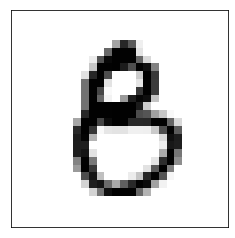

le chiffre reconnu est:  8
le chiffre à reconnaitre  est:  8


In [61]:
def plot_mnist_digit(image):
    """ Plot a single MNIST image."""
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.matshow(image, cmap = matplotlib.cm.binary)
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
    plt.show()
loss,acc = model.evaluate(x_test, y_test,  verbose=0)
index=800
print('The accuracy on the test set is ',(acc*100),'%')
plot_mnist_digit(X_test_base[index])
cl=model.predict_classes(x_test[index].reshape((1,28,28,1)))


print("le chiffre reconnu est: ", cl[0])
print("le chiffre à reconnaitre  est: ", np.argmax(y_test[index]))



### Auto Encodeur

L'auto-encodeur est un réseau de neurones qui compresse puis décompresse l'information. On l'entraîne en lui demandant de retrouver en sortie la même image que celle qu'il avait en entrée. Ici, l'information en entrée est en dimension 784 (28x28), et l'auto-encodeur va la compresser en dimension 2.

In [63]:
encoding_dim = 2

model = Sequential()
model.add(Dense(encoding_dim, input_shape=(784,),activation='relu'))

model.add(Dense(784, activation='sigmoid'))
    
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='binary_crossentropy',  optimizer=sgd)

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 2)                 1570      
_________________________________________________________________
dense_27 (Dense)             (None, 784)               2352      
Total params: 3,922
Trainable params: 3,922
Non-trainable params: 0
_________________________________________________________________


In [64]:
(X_train, _), (X_test, _) = mnist.load_data()
subset=50000 #size
X_train = X_train[:subset].reshape(subset, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255

In [65]:
model.fit(X_train, X_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 58us/step - loss: 0.4468 - val_loss: 0.2761
Epoch 2/50
50000/50000 [==============================] - 2s 50us/step - loss: 0.2742 - val_loss: 0.2709
Epoch 3/50
50000/50000 [==============================] - 3s 51us/step - loss: 0.2696 - val_loss: 0.2658
Epoch 4/50
50000/50000 [==============================] - 2s 49us/step - loss: 0.2632 - val_loss: 0.2586
Epoch 5/50
50000/50000 [==============================] - 3s 57us/step - loss: 0.2574 - val_loss: 0.2541
Epoch 6/50
50000/50000 [==============================] - 2s 47us/step - loss: 0.2543 - val_loss: 0.2520
Epoch 7/50
50000/50000 [==============================] - 2s 48us/step - loss: 0.2529 - val_loss: 0.2510
Epoch 8/50
50000/50000 [==============================] - 2s 48us/step - loss: 0.2521 - val_loss: 0.2504
Epoch 9/50
50000/50000 [==============================] - 2s 49us/step - loss: 0.2515 - val_loss: 0.2498
Epoch

In [66]:
decoded_imgs = model.predict(X_test)

Affichons quelques images pour voir comment se comporte notre auto-encodeur.

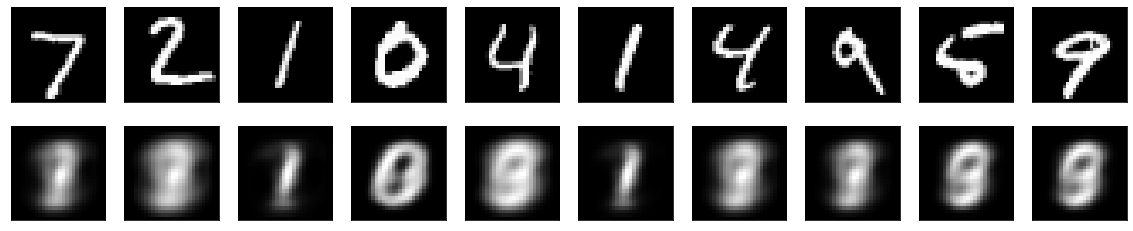

In [67]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()